In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

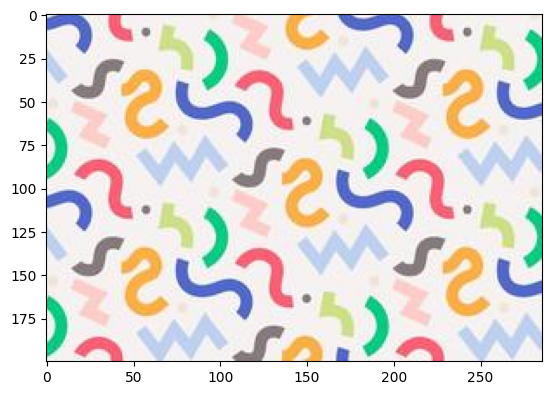

(200, 286, 3)


In [2]:
img=cv.imread("./pattern1.jpg")
img=cv.cvtColor(img,cv.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()
print(img.shape)

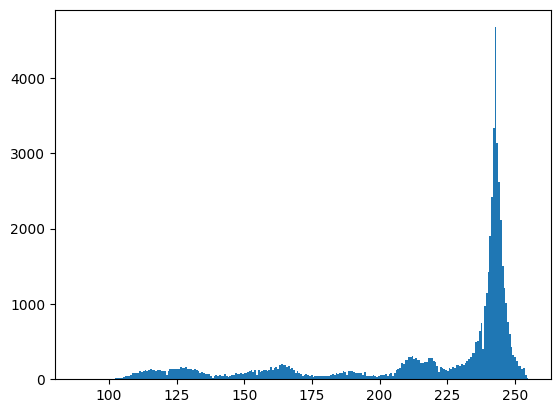

In [3]:
vals=img.mean(axis=2).flatten()
plt.hist(vals,bins=255)
plt.show()

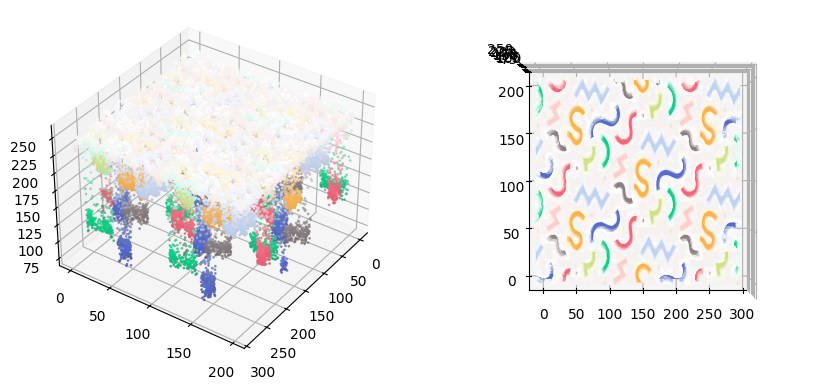

In [4]:
fig=plt.figure(figsize=(10, 6))
ax1=fig.add_subplot(1,2,1,projection='3d')
ax2=fig.add_subplot(1,2,2,projection='3d')
ax1.view_init(35,35)
ax2.view_init(90,0,90)

x=[]
y=[]
z=[]

for i in range(img.shape[0]):
    x.append(i)
for i in range(img.shape[1]):
    y.append(i)

X,Y=np.meshgrid(y,x)
Z = np.dot(img[:,:,:], [0.2989, 0.5870, 0.1140])

colors = img.reshape(-1, 3) / 255.0

ax1.scatter(
    X.flatten(),
    Y.flatten(),
    Z.flatten(),
    c=colors,
    s=1
)
ax2.scatter(
    X.flatten(),
    Y.flatten(),
    Z.flatten(),
    c=colors,
    s=1
)
plt.show()

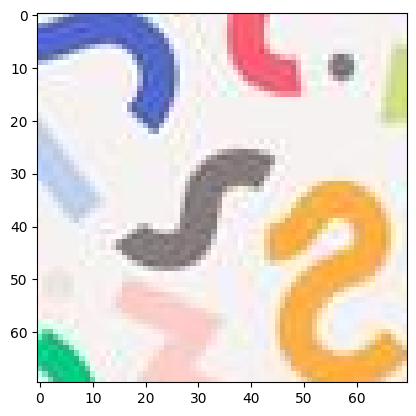

(70, 70, 3)


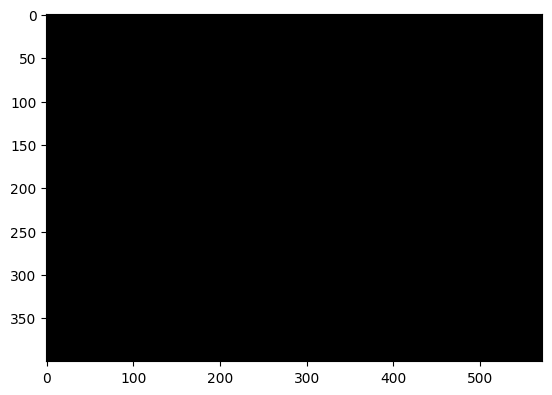

(400, 572, 3)


In [5]:
synthesis_img_size=(400,572,3)
block_size=(70,70,3)

synthesis_img=np.zeros(synthesis_img_size).astype(np.uint8)

plt.imshow(img[:block_size[0],:block_size[1]])
plt.show()
print(img[:block_size[0],:block_size[1]].shape)
plt.imshow(synthesis_img)
plt.show()
print(synthesis_img.shape)

Tiling blocks next to each other

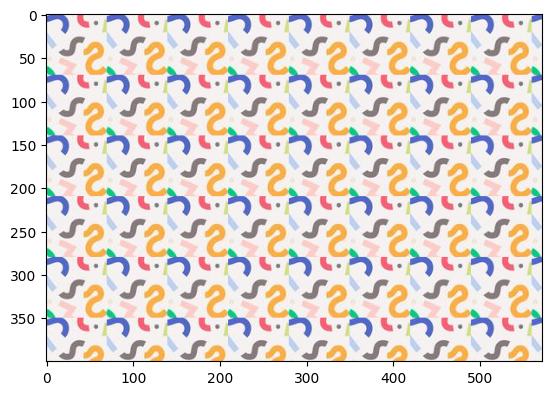

In [6]:
for i in range(0,synthesis_img.shape[0]):
    for j in range(0,synthesis_img.shape[1]):
        synthesis_img[i,j]=img[i%block_size[0],j%block_size[1]]
plt.imshow(synthesis_img)
plt.show()

Introducing a bit of randomness

In [7]:
def get_random_patch(img,synthesis_img_size,block_size,x,y):
    offset=(np.random.randint(0,img.shape[0]-block_size[0]),np.random.randint(0,img.shape[1]-block_size[1]))
    fill_size=list(block_size)
    if(x+block_size[0]>=synthesis_img_size[0]):
        fill_size[0]=synthesis_img_size[0]-x
    if(y+block_size[1]>=synthesis_img_size[1]):
        fill_size[1]=synthesis_img_size[1]-y
    patch=img[offset[0]:offset[0]+fill_size[0],offset[1]:offset[1]+fill_size[1]]

    return patch

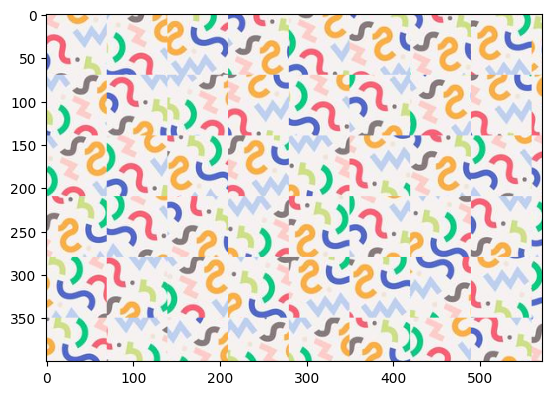

In [8]:
synthesis_img=np.zeros(synthesis_img_size).astype(np.uint8)

for x in range(0,synthesis_img.shape[0],block_size[0]):
    for y in range(0,synthesis_img.shape[1],block_size[1]):
        patch=get_random_patch(img,synthesis_img_size,block_size,x,y)
        synthesis_img[x:x+block_size[0],y:y+block_size[1]]=patch
plt.imshow(synthesis_img)
plt.show()

Overlap one pixel row/column of each block

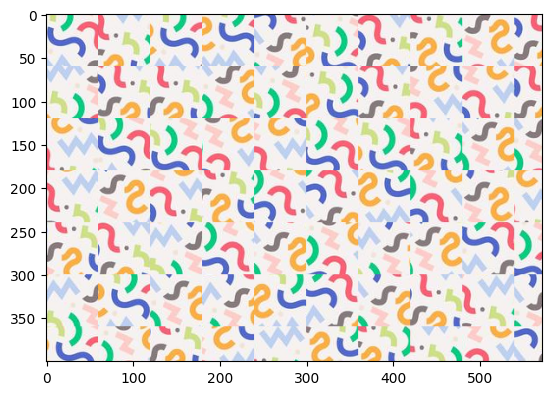

In [21]:
synthesis_img=np.zeros(synthesis_img_size).astype(np.uint8)

overlap=10
for x in range(0,synthesis_img.shape[0],block_size[0]-overlap):
    for y in range(0,synthesis_img.shape[1],block_size[1]-overlap):
        patch=get_random_patch(img,synthesis_img_size,block_size,x,y)
        synthesis_img[x:x+block_size[0],y:y+block_size[1]]=patch

plt.imshow(synthesis_img)
plt.show()